# Plot History - Initial Conditions Optimization

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.style as style
style.use('fivethirtyeight')
import LearnerICNoRay as Learner
import ray
import io
import os

ModuleNotFoundError: No module named 'LearnerIC'

In [2]:
import matplotlib.font_manager as fm
# Font Imports
heading_font = fm.FontProperties(fname='/home/ats4i/playfair-display/PlayfairDisplay-Regular.ttf', size=24)
subtitle_font = fm.FontProperties(fname='/home/ats4i/Roboto/Roboto-Regular.ttf', size=16)

In [3]:
#append new lines to a csv file
def append_new_line(file_name, text_to_append):
    #Append given text as a new line at the end of file
    # Open the file in append & read mode ('a+')
    with open(file_name, "a+") as file_object:
        # Move read cursor to the start of file.
        file_object.seek(0)
        # If file is not empty then append '\n'
        data = file_object.read(9999999)
        if len(data) > 0:
            file_object.write("\n")
        # Append text at the end of file
        file_object.write(text_to_append)

In [4]:
#load infected cases from database
def load_confirmed(state, startdate):
        dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
        df = pd.read_csv('./data/confirmados.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
        y=[]
        x=[]
        for i in range(0,len(df.date)):
            y.append(df[state].values[i])
            x.append(df.date.values[i])
        df2=pd.DataFrame(data=y,index=x,columns=[""])
        df2=df2[startdate:]
        return df2

In [5]:
#load death cases from database
def load_dead(state, startdate):
    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    df = pd.read_csv('./data/mortes.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
    y=[]
    x=[]
    for i in range(0,len(df.date)):
        y.append(df[state].values[i])
        x.append(df.date.values[i])
    df2=pd.DataFrame(data=y,index=x,columns=[""])
    df2=df2[startdate:]
    return df2

In [6]:
states=['SP','ES','MG','RJ','PE','CE','AM']
# states=['ES']

In [7]:
#delete previous results for all states
strFile="results/IC_optimizedStates.csv"
if os.path.isfile(strFile):
    os.remove(strFile)

In [8]:
opt=0

#select history file version
if opt==0:
    version=10 
    model="Brute Force"

if opt==1:
    version=100 
    model="Yabox"

Main code

In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;}%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;}

<IPython.core.display.Javascript object>

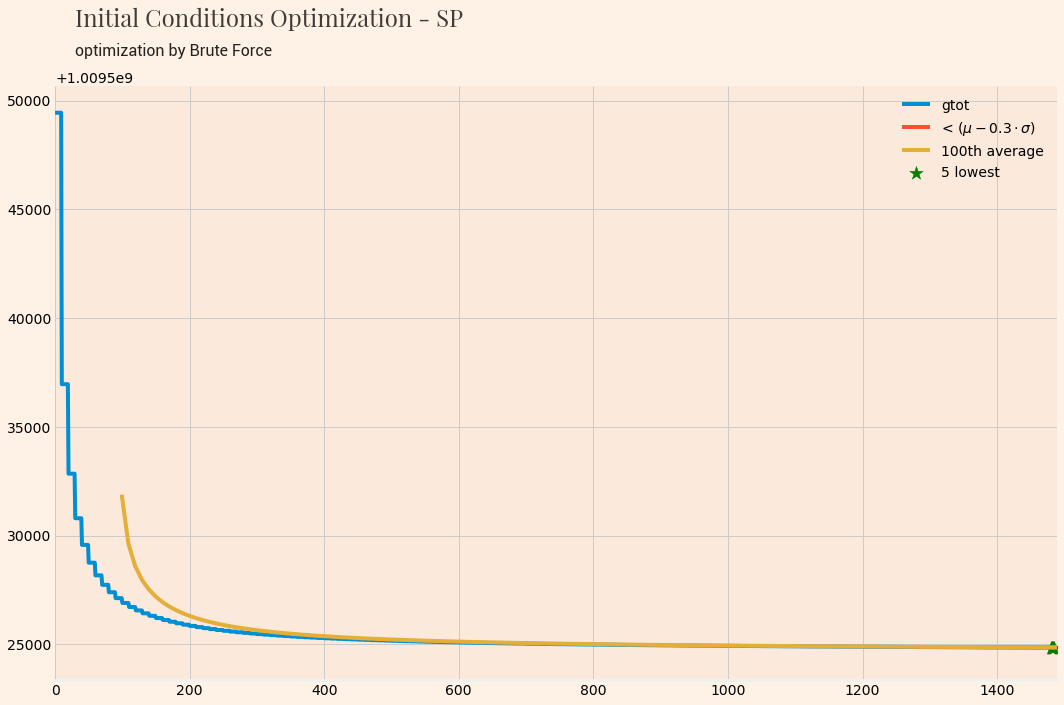

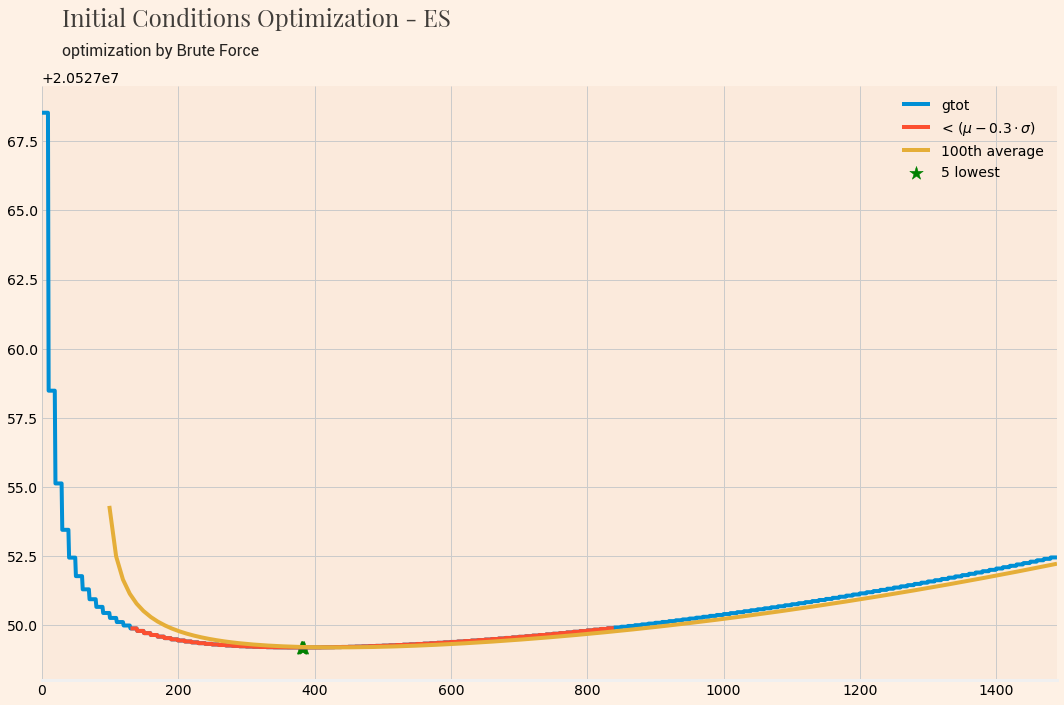

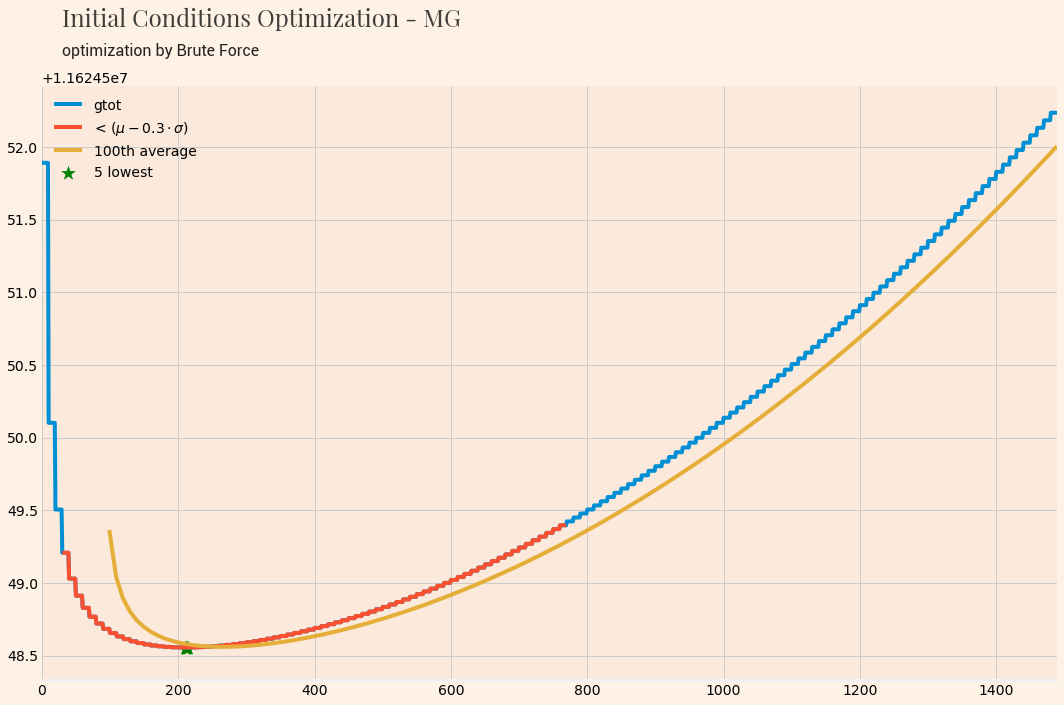

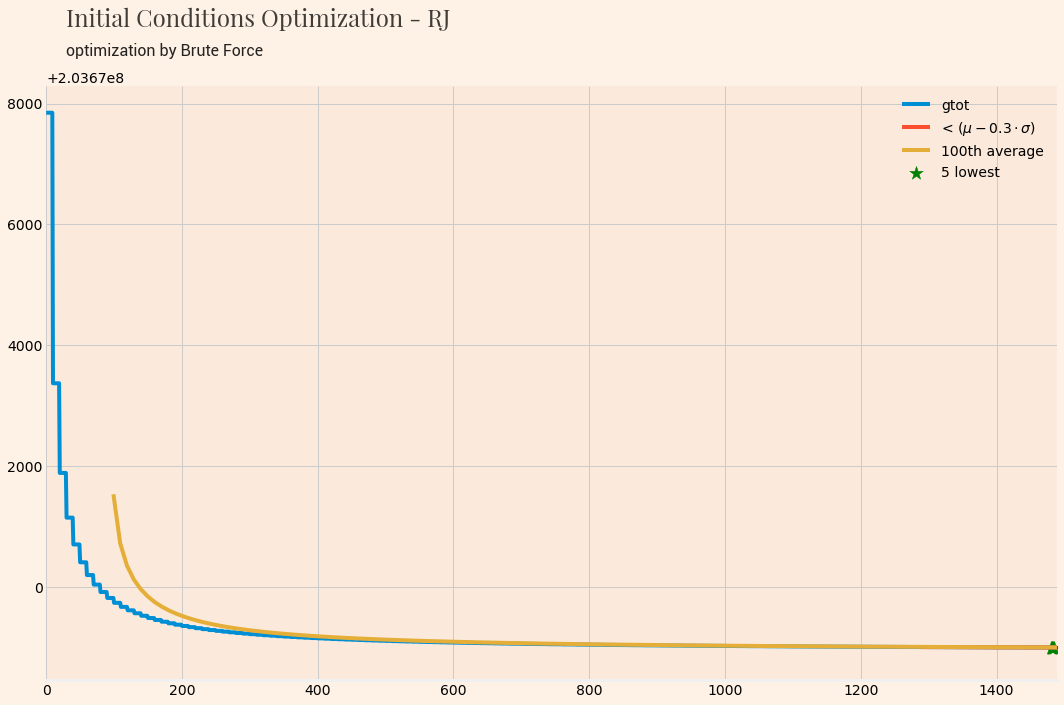

ValueError: zero-size array to reduction operation fmin which has no identity

In [10]:
for state in states:
    versionStr=str(version)
    histOptAll= pd.read_table('./results/history_'+state+versionStr+'.csv', sep=",", index_col=0, header=None, 
        names = ["iterations","state","gtot",\
            "s0","startdate","i0","wcases","wrec",\
            "beta0","beta01","startT","beta2","sigma",\
            "sigma2","sigma3","gamma","b","gamma2","d","mu"])

    #clean data
    histOptAll=histOptAll.dropna(how='all')
    histOptAll.gtot=pd.to_numeric(histOptAll.gtot, errors='coerce')
    # histOptAll.drop(histOptAll[histOptAll['gtot'] > 2.5e4].index, inplace = True)
    histOptAll = histOptAll.reset_index(drop=True)

    #print parameters
    histOpt=histOptAll[histOptAll.gtot==min(histOptAll.gtot)]
    histOpt=histOpt.head(1)
    histOpt.to_csv("results/IC_optimized"+state+".csv", sep=",", index=False)
    append_new_line("results/IC_optimizedStates.csv", '\n'.join(','.join('%s' %x for x in y) for y in histOpt.values))

    #prepare plotting
    color_bg = '#FEF1E5'
    # lighter_highlight = '#FAE6E1'
    darker_highlight = '#FBEADC'
    plt.rc('font', size=14)
    fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
    ax.patch.set_facecolor(darker_highlight)
    # Hide the left, right and top spines
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #PLOTTING itself
    x=histOptAll.index
    y=histOptAll.gtot
    ax.plot(x,y, label="gtot")
    x=histOptAll.index[histOptAll.gtot<=(np.mean(histOptAll.gtot)-.3*np.std(histOptAll.gtot))]
    y=histOptAll.gtot[histOptAll.gtot<=(np.mean(histOptAll.gtot)-.3*np.std(histOptAll.gtot))]
    ax.plot(x, y,label="< ($\mu - 0.3 \cdot \sigma$)")
    histMin=histOptAll.nsmallest(5, ['gtot'])
    ax.scatter(histMin.index, histMin.gtot,label="5 lowest",c='green',marker='*',s=200)
    histOptAll.rolling(100).mean()['gtot'].plot(label="100th average")

    # Adding a title and a subtitle
    plt.text(x = 0.02, y = 1.1, s = "Initial Conditions Optimization - "+state,
                fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
                fontproperties=heading_font)
    plt.text(x = 0.02, y = 1.05,
                s = "optimization by "+model,
                fontsize = 26, alpha = .85,transform=ax.transAxes, 
                fontproperties=subtitle_font)
    ax.legend(frameon=False)
    fig.tight_layout()
    strFile ='./results/convergence_'+state+versionStr+'.png'
    fig.savefig(strFile, facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())
    
    plt.show()